AD: Recep

SOYAD: Çalışkan

OKUL NUMARASI: 2312721004

GİTHUB REPO BAĞLANTISI: https://github.com/RecepClskn/genetik_optimizasyonu.git

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Genel Ayarlar
populasyon_buyuklugu = 100
max_iterasyon_sayisi = 150
caprazlama_orani = 0.8
mutasyon_orani = 0.05
turnuva_boyutu = 3

# Değişken Sınırları
SINIR = np.array([
    [0, 50],     # Gübre (x1)
    [0, 100]     # Sulama (x2)
])

In [25]:
# Amac Fonksiyonumuz

def hedef_fonksiyon(gubre, su):
    return 10*gubre + 6*su - 0.5*gubre**2 - 0.2*su**2

# Fitness Hesabı için Fonksiyon
def uygunluk_degeri_fonksiyonu(birey):
    gubre, su = birey
    ceza = 0

    # Kısıt 1: Toprak doygunluğu
    if gubre + 0.1 * su > 60:
        ceza += (gubre + 0.1 * su - 60) * 50

    # Kısıt 2: Minimum su ihtiyacı
    if su < 20:
        ceza += (20 - su) * 50

    return hedef_fonksiyon(gubre, su) - ceza


In [26]:
# Popülasyon (Başlangıç için)
def baslangic_populasyonu(adet):
    bireyler = np.zeros((adet, 2))
    bireyler[:, 0] = np.random.uniform(SINIR[0, 0], SINIR[0, 1], adet)
    bireyler[:, 1] = np.random.uniform(SINIR[1, 0], SINIR[1, 1], adet)
    return bireyler

In [27]:
# Turnuva Hesabı
def ebeveyn_secimi(cozumler, skorlar):
    secilenler = np.random.randint(0, len(cozumler), turnuva_boyutu)
    en_iyi = secilenler[0]

    for i in secilenler:
        if skorlar[i] > skorlar[en_iyi]:
            en_iyi = i

    return cozumler[en_iyi]

In [28]:
# Çaprazlama
def birlestir(a, b):
    if np.random.rand() < caprazlama_orani:
        w = np.random.rand()
        c1 = w * a + (1 - w) * b
        c2 = (1 - w) * a + w * b
        return c1, c2
    return a.copy(), b.copy()

# Mutasyon
def degistir(birey):
    for i in range(2):
        if np.random.rand() < mutasyon_orani:
            sigma = (SINIR[i, 1] - SINIR[i, 0]) * 0.1
            birey[i] += np.random.normal(0, sigma)
            birey[i] = np.clip(birey[i], SINIR[i, 0], SINIR[i, 1])
    return birey


In [29]:
# Genetik Algoritma
def genetik_optimizasyon():
    cozumler = baslangic_populasyonu(populasyon_buyuklugu)
    en_iyi_skorlar = []

    en_iyi_birey = None
    en_iyi_skor = -np.inf

    print("Optimizasyon süreci başlatıldı...\n")

    for adim in range(max_iterasyon_sayisi):
        skorlar = np.array([uygunluk_degeri_fonksiyonu(b) for b in cozumler])

        idx = np.argmax(skorlar)
        if skorlar[idx] > en_iyi_skor:
            en_iyi_skor = skorlar[idx]
            en_iyi_birey = cozumler[idx].copy()

        en_iyi_skorlar.append(en_iyi_skor)

        # Elitizm (En iyi sonuçlar için)
        yeni_cozumler = [en_iyi_birey.copy()]

        while len(yeni_cozumler) < populasyon_buyuklugu:
            p1 = ebeveyn_secimi(cozumler, skorlar)
            p2 = ebeveyn_secimi(cozumler, skorlar)

            y1, y2 = birlestir(p1, p2)
            yeni_cozumler.append(degistir(y1))

            if len(yeni_cozumler) < populasyon_buyuklugu:
                yeni_cozumler.append(degistir(y2))

        cozumler = np.array(yeni_cozumler)

        if (adim + 1) % 20 == 0:
            print(f"Adım {adim+1}: En iyi uygunluk = {en_iyi_skor:.4f}")

    return en_iyi_birey, en_iyi_skorlar

Optimizasyon süreci başlatıldı...

Adım 20: En iyi uygunluk = 89.1345
Adım 40: En iyi uygunluk = 89.8230
Adım 60: En iyi uygunluk = 89.8230
Adım 80: En iyi uygunluk = 89.8232
Adım 100: En iyi uygunluk = 89.9798
Adım 120: En iyi uygunluk = 89.9798
Adım 140: En iyi uygunluk = 89.9798

--- OPTİMUM ÇÖZÜM BİÇİMİ ---
Gübre Miktarı : 10.0000 kg/da
Sulama Miktarı: 20.0101 L/da
Maksimum Alınabilecek Verim: 89.9798

--- KISIT KONTROLÜ ---
Toprak Sınırları: 12.0010 ≤ 60
Minimum Su  : 20.0101 ≥ 20


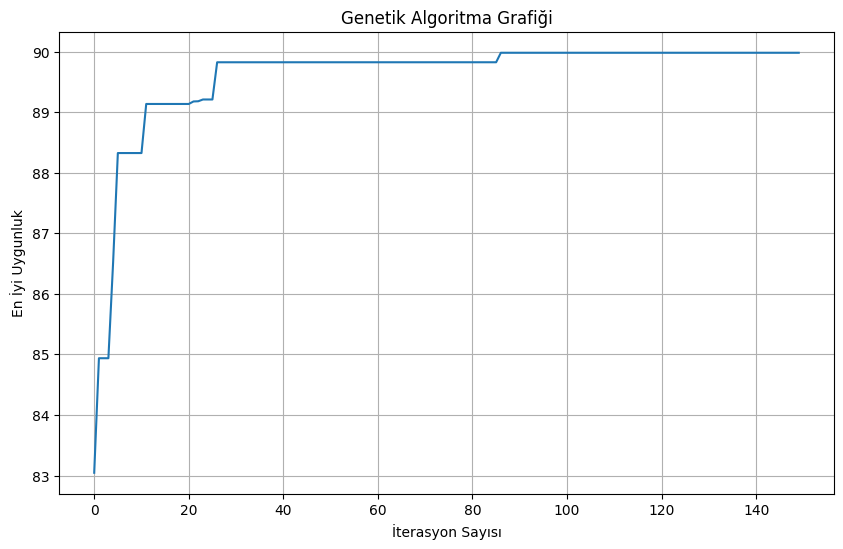

In [30]:
# Sonuç Kısmı
optimum, skor_gecmisi = genetik_optimizasyon()

gubre_opt, su_opt = optimum
verim_opt = hedef_fonksiyon(gubre_opt, su_opt)

print("\n--- OPTİMUM ÇÖZÜM BİÇİMİ ---")
print(f"Gübre Miktarı : {gubre_opt:.4f} kg/da")
print(f"Sulama Miktarı: {su_opt:.4f} L/da")
print(f"Maksimum Alınabilecek Verim: {verim_opt:.4f}")

print("\n--- KISIT KONTROLÜ ---")
print(f"Toprak Sınırları: {gubre_opt + 0.1*su_opt:.4f} ≤ 60")
print(f"Minimum Su  : {su_opt:.4f} ≥ 20")

# GRAFİK
plt.figure(figsize=(10, 6))
plt.plot(skor_gecmisi)
plt.xlabel("İterasyon Sayısı")
plt.ylabel("En İyi Uygunluk")
plt.title("Genetik Algoritma Grafiği")
plt.grid(True)
plt.show()
